In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
mpl.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [3]:
data_train = pd.read_excel(r'd:\\专题工作（重要）\产销差工作\2022年分公司产销差率计划\产销差率月份预计.xlsx',
                    sheet_name='日供水数据',skiprows=1,header=[0,1],nrows=800)#修改
data_train = data_train[[('趸售区域','黄岐'),('趸售区域','花都'),('趸售区域','人和'),('趸售区域','穗云'),
                         ('趸售明细','开发区东区'),('趸售明细','开发区北区'),('非趸售','中'),('非趸售','东'),('非趸售','南'),('非趸售','北'),
                        ('分公司','中区'),('分公司','东区'),('分公司','南区'),('分公司','北区')]].dropna()[-17:]#修改

data_train

趸售区域                                  趸售明细                 非趸售  \
          黄岐        花都       人和       穗云     开发区东区    开发区北区          中   
764  15281.0   18149.0  27002.0  35244.0  140168.0  28966.0   870815.0   
765  15445.0   10245.0  28710.0  37473.0  143573.0  29673.0   864632.0   
766  14753.0   28190.0  28651.0  38219.0  135563.0  29330.0   870789.0   
767  15383.0   35261.0  28889.0  38470.0  145051.0  28983.0   890186.0   
768  16275.0   27415.0  28887.0  38587.0  151163.0  29233.0   907249.0   
769  16870.0   44955.0  29961.0  39789.0  170121.0  29654.0   940061.0   
770  23035.0   42865.0  30251.0  38488.0  187127.0  29242.0   964904.0   
771  18603.0   55108.0  33168.0  41279.0  203003.0  29206.0   993071.0   
772  19297.0   71172.0  33766.0  42659.0  212860.0  29041.0  1006330.0   
773  19235.0   70629.0  35247.0  44849.0  234772.0  29134.0  1014539.0   
774  19694.0   87525.0  36664.0  45524.0  241137.0  29444.0  1033911.0   
775  16616.0   91589.0  38276.0  47235.0  243241.0  29349.0  1046960.0   
776  27590.0   81630.0  34553.0  44895.0  237971.0  28661.0  1044408.0   
777  34899.0  113195.0  36858.0  46531.0  264807.0  28926.0  1072646.0   
778  22384.0  128454.0  38739.0  47278.0  262859.0  29757.0  1068310.0   
779  28291.0  120025.0  38130.0  47059.0  269969.0  28783.0  1073872.0   
780  29572.0  125019.0  39564.0  45991.0  259515.0  22572.0  1068877.0   

                                          分公司                                  
             东         南         北         中区         东区         南区        北区  
764   760488.0  757895.0  478982.0   870815.0   900656.0   773176.0  588343.0  
765   721356.0  772418.0  485875.0   864632.0   864929.0   787863.0  591976.0  
766   761288.0  765840.0  483218.0   870789.0   896851.0   780593.0  607608.0  
767   786673.0  788740.0  501499.0   890186.0   931724.0   804123.0  633102.0  
768   812769.0  808595.0  513224.0   907249.0   963932.0   824870.0  637346.0  
769   837685.0  833324.0  539659.0   940061.0  1007806.0   850194.0  684018.0  
770   890863.0  850130.0  558844.0   964904.0  1077990.0   873165.0  699690.0  
771   921794.0  893127.0  598308.0   993071.0  1124797.0   911730.0  757069.0  
772   938975.0  901232.0  647267.0  1006330.0  1151835.0   920529.0  823905.0  
773   956157.0  919632.0  633444.0  1014539.0  1190929.0   938867.0  813303.0  
774   990588.0  944847.0  659420.0  1033911.0  1231725.0   964541.0  858577.0  
775   995173.0  971698.0  673158.0  1046960.0  1238414.0   988314.0  879607.0  
776   958175.0  938036.0  662217.0  1044408.0  1196146.0   965626.0  851956.0  
777  1014944.0  958767.0  685764.0  1072646.0  1279751.0   993666.0  911274.0  
778  1025023.0  991781.0  724920.0  1068310.0  1287882.0  1014165.0  969148.0  
779  1025677.0  983303.0  717632.0  1073872.0  1295646.0  1011594.0  951629.0  
780  1002516.0  963557.0  700642.0  1068877.0  1262031.0   993129.0  933788.0

[1006330.0,
 1014539.0,
 1033911.0,
 1046960.0,
 1044408.0,
 1072646.0,
 1068310.0,
 1073872.0,
 1068877.0]

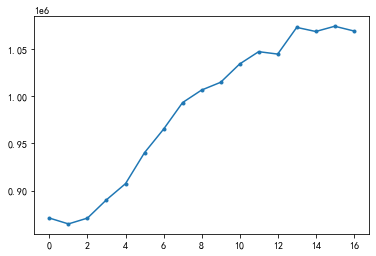

In [6]:

plt.plot(list(data_train.get(('分公司','中区'))), marker='.')
list(data_train.get(('分公司','中区')))[-9:]

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                    8
Model:             ExponentialSmoothing   SSE                              0.000
Optimized:                         True   AIC                           -148.370
Trend:                         Additive   BIC                           -147.417
Seasonal:                      Additive   AICC                               inf
Seasonal Periods:                     7   Date:                 Fri, 18 Feb 2022
Box-Cox:                          False   Time:                         16:26:14
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9500000                alpha                False
smoothing_trend          

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


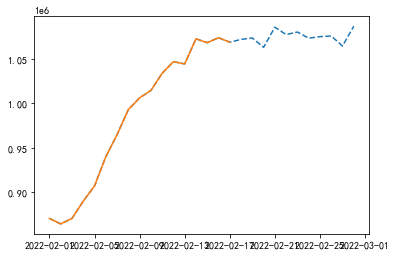

In [12]:
data1 = list(data_train.get(('分公司','中区')))[-8:]
# 数据    
# 训练
# fit1 = SimpleExpSmoothing(data).fit()
# fit2 = Holt(data).fit()
# fit3 = Holt(data, exponential=True).fit()
# fit4 = Holt(data, exponential=False, damped_trend=True).fit()
# fit5 = Holt(data, exponential=True, damped_trend=True).fit()
# fit6 = ExponentialSmoothing(data, seasonal_periods=7, trend='add', seasonal='add').fit()
# fit7 = ExponentialSmoothing(data, seasonal_periods=7, trend='add', seasonal='mul').fit()
# fit8 = ExponentialSmoothing(data, seasonal_periods=7, trend='mul', seasonal='add').fit()
# fit9 = ExponentialSmoothing(data, seasonal_periods=7, trend='mul', seasonal='mul').fit()
# fit10 = ExponentialSmoothing(data, seasonal_periods=7, trend='add', seasonal='add', damped_trend=True).fit()
# fit11 = ExponentialSmoothing(data, seasonal_periods=7, trend='add', seasonal='mul', damped_trend=True).fit()
# fit12 = ExponentialSmoothing(data, seasonal_periods=7, trend='mul', seasonal='add', damped_trend=True).fit()
# fit13 = ExponentialSmoothing(data, seasonal_periods=7, trend='mul', seasonal='mul', damped_trend=True).fit()
fit1 = ExponentialSmoothing(data1,seasonal_periods=7, trend='add', seasonal='add',damped_trend=True).fit(
    smoothing_level=0.95, smoothing_trend=0.2, smoothing_seasonal=0.99,damping_trend=0.7, optimized=True)
print(fit1.summary())
print(fit1.forecast(11))
plt.plot(pd.date_range('2022-2-1',periods=28),list(data_train.get(('分公司','中区')))+list(fit1.forecast(11)), linestyle='--')
plt.plot(pd.date_range('2022-2-1',periods=17),list(data_train.get(('分公司','中区'))))



                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                    8
Model:             ExponentialSmoothing   SSE                              0.000
Optimized:                         True   AIC                           -157.194
Trend:                         Additive   BIC                           -156.241
Seasonal:                      Additive   AICC                               inf
Seasonal Periods:                     7   Date:                 Fri, 18 Feb 2022
Box-Cox:                          False   Time:                         16:31:04
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9500000                alpha                False
smoothing_trend          

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


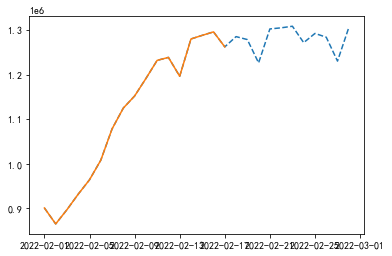

In [18]:
data2 = list(data_train.get(('分公司','东区')))[-8:]
fit2 = ExponentialSmoothing(data2,seasonal_periods=7, trend='add', seasonal='add',damped_trend=True).fit(
    smoothing_level=0.95, smoothing_trend=0.2, smoothing_seasonal=0.01,damping_trend=0.75, optimized=True)
print(fit2.summary())
print(fit2.forecast(11))#修改
plt.plot(pd.date_range('2022-2-1',periods=28),list(data_train.get(('分公司','东区')))+list(fit2.forecast(11)), linestyle='--')
plt.plot(pd.date_range('2022-2-1',periods=17),list(data_train.get(('分公司','东区'))))

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                    8
Model:             ExponentialSmoothing   SSE                              0.000
Optimized:                         True   AIC                           -151.131
Trend:                         Additive   BIC                           -150.177
Seasonal:                      Additive   AICC                               inf
Seasonal Periods:                     7   Date:                 Fri, 18 Feb 2022
Box-Cox:                          False   Time:                         16:33:17
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9500000                alpha                False
smoothing_trend          

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


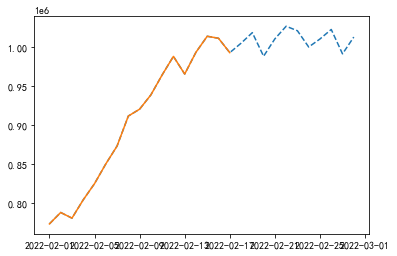

In [19]:
data3 = list(data_train.get(('分公司','南区')))[-8:]
fit3 = ExponentialSmoothing(data3,seasonal_periods=7, trend='add', seasonal='add',damped_trend=True).fit(
    smoothing_level=0.95, smoothing_trend=0.2, smoothing_seasonal=0.01,damping_trend=0.75, optimized=True)
print(fit3.summary())
print(fit3.forecast(11))
plt.plot(pd.date_range('2022-2-1',periods=28),list(data_train.get(('分公司','南区')))+list(fit3.forecast(11)), linestyle='--')
plt.plot(pd.date_range('2022-2-1',periods=17),list(data_train.get(('分公司','南区'))))

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                    8
Model:             ExponentialSmoothing   SSE                              0.000
Optimized:                         True   AIC                           -169.513
Trend:                         Additive   BIC                           -168.560
Seasonal:                      Additive   AICC                               inf
Seasonal Periods:                     7   Date:                 Fri, 18 Feb 2022
Box-Cox:                          False   Time:                         16:35:38
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9500000                alpha                False
smoothing_trend          

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


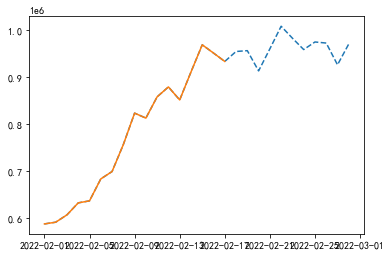

In [21]:
data4 = list(data_train.get(('分公司','北区')))[-8:]
fit4 = ExponentialSmoothing(data4,seasonal_periods=7, trend='add', seasonal='add',damped_trend=True).fit(
    smoothing_level=0.95, smoothing_trend=0.2, smoothing_seasonal=0.01,damping_trend=0.8, optimized=True)
print(fit4.summary())
print(fit4.forecast(11))
plt.plot(pd.date_range('2022-2-1',periods=28),list(data_train.get(('分公司','北区')))+list(fit4.forecast(11)), linestyle='--')
plt.plot(pd.date_range('2022-2-1',periods=17),list(data_train.get(('分公司','北区'))))

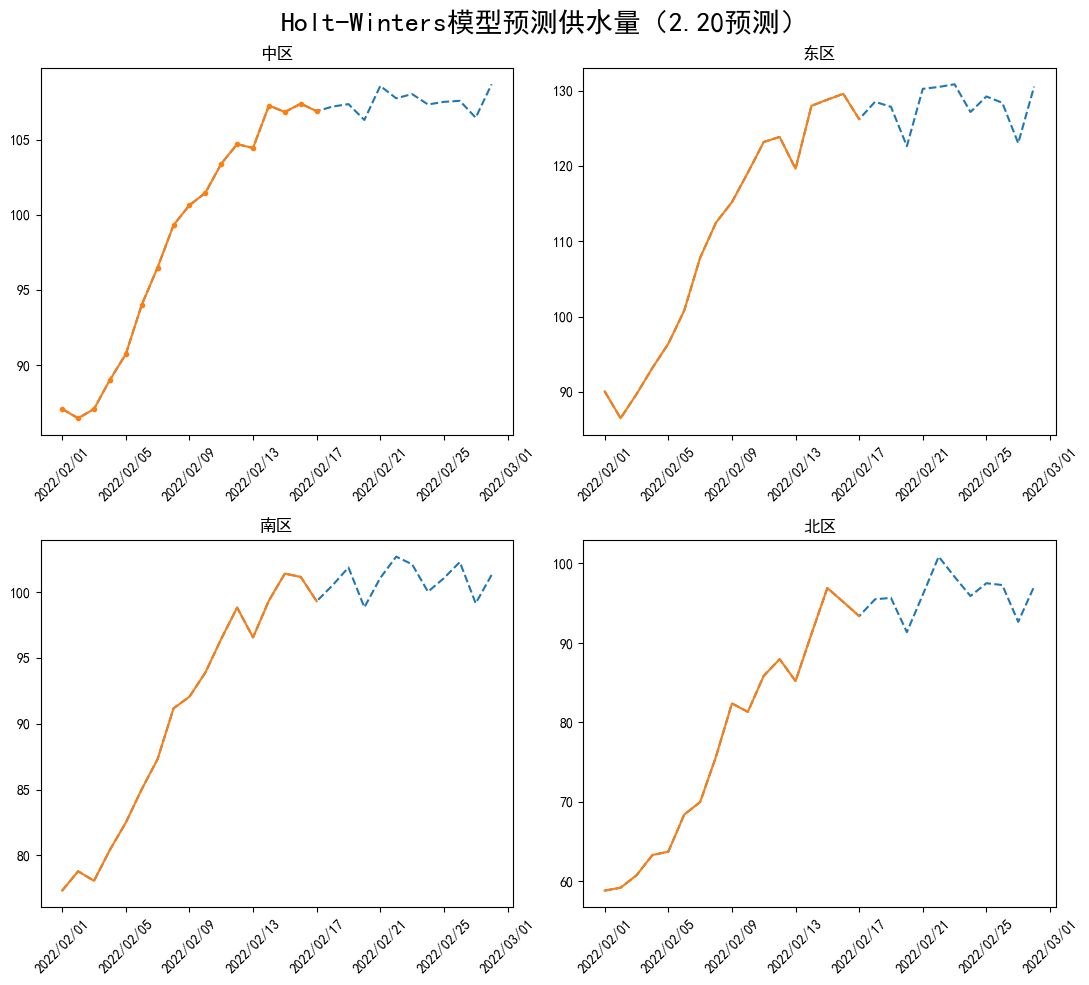

In [27]:
def to_wan(temp, position):
    return '%1.0f'%(temp/10000)
fig, axes = plt.subplots(2,2, figsize=(11, 10),dpi=100)
ax1,ax2,ax3,ax4=axes.flatten()
ax1.set_title('中区')
ax1.plot(pd.date_range('2022-2-1',periods=28),list(data_train.get(('分公司','中区')))+list(fit1.forecast(11)), linestyle='--')
ax1.plot(pd.date_range('2022-2-1',periods=17),list(data_train.get(('分公司','中区'))),marker='.')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(to_wan))
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y/%m/%d'))
ax1.xaxis.set_tick_params(rotation=45)

ax2.set_title('东区')
ax2.plot(pd.date_range('2022-2-1',periods=28),list(data_train.get(('分公司','东区')))+list(fit2.forecast(11)), linestyle='--')
ax2.plot(pd.date_range('2022-2-1',periods=17),list(data_train.get(('分公司','东区'))))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(to_wan))
ax2.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y/%m/%d'))
ax2.xaxis.set_tick_params(rotation=45)

ax3.set_title('南区')
ax3.plot(pd.date_range('2022-2-1',periods=28),list(data_train.get(('分公司','南区')))+list(fit3.forecast(11)), linestyle='--')
ax3.plot(pd.date_range('2022-2-1',periods=17),list(data_train.get(('分公司','南区'))))
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(to_wan))
ax3.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y/%m/%d'))
ax3.xaxis.set_tick_params(rotation=45)

ax4.set_title('北区')
ax4.plot(pd.date_range('2022-2-1',periods=28),list(data_train.get(('分公司','北区')))+list(fit4.forecast(11)), linestyle='--')
ax4.plot(pd.date_range('2022-2-1',periods=17),list(data_train.get(('分公司','北区'))))
ax4.yaxis.set_major_formatter(ticker.FuncFormatter(to_wan))
ax4.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y/%m/%d'))
ax4.xaxis.set_tick_params(rotation=45)

fig.suptitle("Holt-Winters模型预测供水量（2.20预测）",fontsize=20)
fig.tight_layout()
plt.savefig(r'c:\Users\XieJie\Desktop\Holt-Winters模型预测供水量（2.20预测）.svg')

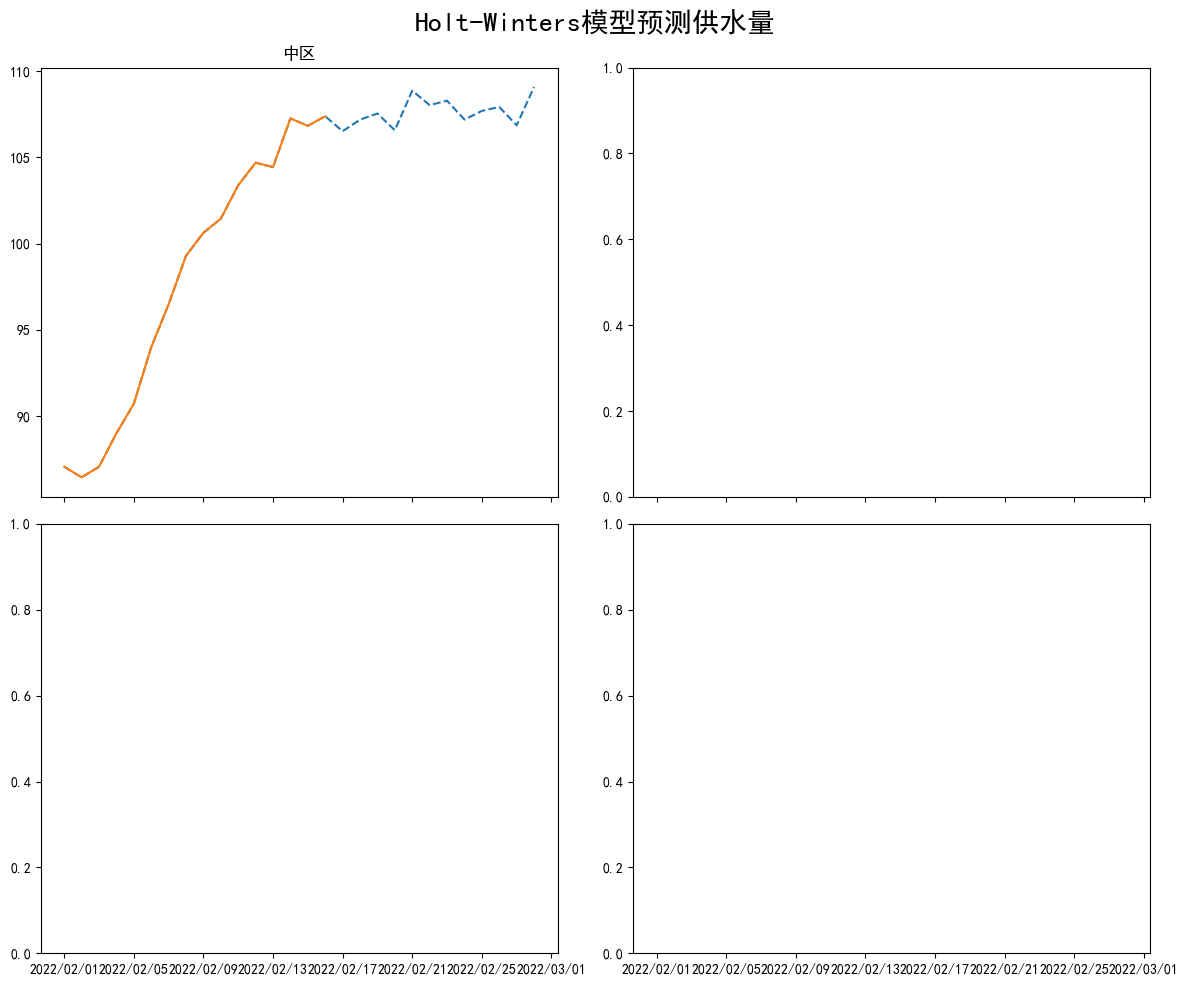

In [100]:
# 效果
FIT = [fit1, fit2, fit3, fit4, fit5, fit6, fit7, fit8, fit9, fit10, fit11, fit12, fit13]
SSE = [fit.sse for fit in FIT]
NAME = ['SES', 'Holt-ADD', 'Holt-MUL', 'Holt-ADD-DAM', 'Holt-MUL-DAM', 'HW-ADD-ADD', 'HW-ADD-MUL', 'HW-MUL-ADD', 'HW-MUL-MUL', 'HW-ADD-ADD-DAM', 'HW-ADD-MUL-DAM', 'HW-MUL-ADD-DAM', 'HW-MUL-MUL-DAM']
# 对比
df = pd.DataFrame({'NAME': NAME, 'SSE': SSE})
df['RANK'] = df['SSE'].rank().astype(int)
print(df.head(13))

sel_index = np.argmin(SSE)
sel_model = FIT[int(sel_index)]
sel_model_name = NAME[int(sel_index)]   

print(fit1.summary())
 
l1, = plt.plot(list(fit1.fittedvalues) + list(fit1.forecast(13)), marker='.')
l2, = plt.plot(list(sel_model.fittedvalues) + list(sel_model.forecast(13)), marker='*')
l3, = plt.plot(data, marker='.')
 
plt.legend(handles = [l1, l2, l3], labels = [ 'SES', sel_model_name,'data'], loc='best', prop={'size': 7})
plt.show()  
print(sel_model.forecast(10))
print(fit1.forecast(10))

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to co

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to co